In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, date, timedelta


df=pd.read_csv('cleaned_dataset_V1.csv')
df2=pd.read_csv('./org_dataset/Food_Establishment_Inspection_Data.csv', low_memory=False)


# prepare df

In [2]:
df.head(1)
df22=df2[['Name','Longitude','Latitude','Business_ID','Violation Description']]
df_main=df.merge(df22,how='inner',on=['Name','Longitude','Latitude'])

In [3]:
df_main.head()

,Name,Inspection Date,Description,City,Longitude,Latitude,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Points,Grade,Category,Business_ID,Violation Description
0,#807 TUTTA BELLA,08/31/2022,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,BLUE,5,1.0,3,PR0089260,"3200 - Insects, rodents, animals not present; ..."
1,#807 TUTTA BELLA,08/31/2022,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,BLUE,5,1.0,3,PR0089260,0200 - Food Worker Cards current for all food ...
2,#807 TUTTA BELLA,08/31/2022,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,BLUE,5,1.0,3,PR0089260,NaN
3,#807 TUTTA BELLA,08/31/2022,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,BLUE,5,1.0,3,PR0089260,NaN
4,#807 TUTTA BELLA,08/31/2022,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,RED,5,1.0,3,PR0089260,"3200 - Insects, rodents, animals not present; ..."


In [4]:
df_main['Inspection Date']=pd.to_datetime(df_main['Inspection Date'])

In [5]:
df_main['year']=pd.DatetimeIndex(df_main['Inspection Date']).year

In [6]:
def get_season(x):
    if 1<=x<=3:
        return 1
    elif 4<=x<=6:
        return 2
    elif 7<=x<=10:
        return 3
    else:
        return 4
df_main['season']=np.vectorize(get_season)(pd.DatetimeIndex(df_main['Inspection Date']).month)


In [7]:
df_main['Week'] = df_main['Inspection Date'].dt.isocalendar().week


In [8]:
df_main.drop('Inspection Date',axis=1,inplace=True)

In [9]:
df_main.head(1)


,Name,Description,City,Longitude,Latitude,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Points,Grade,Category,Business_ID,Violation Description,year,season,Week
0,#807 TUTTA BELLA,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,BLUE,5,1.0,3,PR0089260,"3200 - Insects, rodents, animals not present; ...",2022,3,35


In [10]:
df_final=df_main.groupby(by=['Business_ID','year','season','Week']).mean()


In [11]:
df_final

Longitude   Latitude  Inspection Score  \
Business_ID year season Week                                            
PR0001008   2006 3      41   -122.323413  47.690675               0.0   
                 4      52   -122.323413  47.690675               0.0   
            2007 1      9    -122.323413  47.690675               0.0   
                 3      28   -122.323413  47.690675               2.0   
                 4      51   -122.323413  47.690675               5.0   
...                                  ...        ...               ...   
PR0090614   2022 3      42   -122.373145  47.665447               0.0   
PR0090617   2022 3      43           NaN        NaN               0.0   
PR0090620   2022 3      41           NaN        NaN               0.0   
PR0090622   2022 3      42           NaN        NaN               5.0   
PR0090623   2022 3      41           NaN        NaN               0.0   

                              Inspection Closed Business  Violation Points  \
Business_ID year season Week                                                 
PR0001008   2006 3      41                           0.0               0.0   
                 4      52                           0.0               0.0   
            2007 1      9                            0.0               0.0   
                 3      28                           0.0               2.0   
                 4      51                           0.0               5.0   
...                                                  ...               ...   
PR0090614   2022 3      42                           0.0               0.0   
PR0090617   2022 3      43                           0.0               0.0   
PR0090620   2022 3      41                           0.0               0.0   
PR0090622   2022 3      42                           0.0               5.0   
PR0090623   2022 3      41                           0.0               0.0   

                              Grade  Category  
Business_ID year season Week                   
PR0001008   2006 3      41      1.0       3.0  
                 4      52      1.0       3.0  
            2007 1      9       1.0       3.0  
                 3      28      1.0       3.0  
                 4      51      1.0       3.0  
...                             ...       ...  
PR0090614   2022 3      42      1.0       1.0  
PR0090617   2022 3      43      1.0       2.0  
PR0090620   2022 3      41      1.0       3.0  
PR0090622   2022 3      42      1.0       3.0  
PR0090623   2022 3      41      1.0       3.0  

[221032 rows x 7 columns]

# ratio between inspection mean and number of inspections 

In [12]:
df_temp=df_main.groupby(['Business_ID','year']).mean()

my_columns=['Inspection Score','inspections_number','ratio','Business_ID','year']
df_ratio=pd.DataFrame(columns=my_columns,index=df_temp.index)

df_ratio.head(1)




,,Inspection Score,inspections_number,ratio,Business_ID,year
Business_ID,year,,,,,
PR0001008,2006,NaN,NaN,NaN,NaN,NaN


In [13]:
#fill new df
df_ratio['Inspection Score']=df_temp['Inspection Score']
df_ratio.head()

Inspection Score inspections_number ratio Business_ID year
Business_ID year                                                            
PR0001008   2006          0.000000                NaN   NaN         NaN  NaN
            2007          2.333333                NaN   NaN         NaN  NaN
            2008          0.000000                NaN   NaN         NaN  NaN
            2009          0.000000                NaN   NaN         NaN  NaN
            2010          0.000000                NaN   NaN         NaN  NaN

In [14]:

Business_IDs=[Business_ID for Business_ID in df_main.Business_ID.unique()]
years=[year for year in df_main.year.unique()]


In [15]:
def fill_onspection_number(Business_ID):
    df_id=df_final.loc[Business_ID]
    for year in  years:
        try:
            
            df_ratio.loc[(Business_ID,year),'inspections_number']=len(df_id.loc[year])
        except:
            continue
        
        



for Business_ID in Business_IDs:
    fill_onspection_number(Business_ID)

In [71]:
def fill_ratio(Business_ID):
    for year in  years:
        try:

            df_ratio.loc[(Business_ID,year),'ratio']=df_ratio.loc[(Business_ID,year),'Inspection Score']/df_ratio.loc[(Business_ID,year),'inspections_number']
        except:
            continue
for Business_ID in Business_IDs:
    fill_ratio(Business_ID)

In [90]:
df_ratio

Inspection Score inspections_number     ratio
Business_ID year                                               
PR0001008   2006          0.000000                  2       0.0
            2007          2.333333                  3  0.777778
            2008          0.000000                  3       0.0
            2009          0.000000                  1       0.0
            2010          0.000000                  3       0.0
...                            ...                ...       ...
PR0090614   2022          0.000000                  1       0.0
PR0090617   2022          0.000000                  1       0.0
PR0090620   2022          0.000000                  1       0.0
PR0090622   2022          5.000000                  1       5.0
PR0090623   2022          0.000000                  1       0.0

[95383 rows x 3 columns]

In [ ]:
#df_ratio=df_ratio.drop(['Business_ID','year'],axis=1)


In [92]:
df_ratio_plot=df_ratio.groupby('year').mean(numeric_only=False).reset_index(level='year')
df_ratio_plot


,year,Inspection Score,inspections_number,ratio
0,2006,7.574141,3.027778,2.921690
1,2007,7.810045,2.922050,3.118073
2,2008,7.327312,2.949463,2.956983
3,2009,7.611213,2.675588,3.469699
4,2010,7.872849,3.183438,3.227679
5,2011,7.057324,3.048917,2.789172
6,2012,7.359271,3.055902,2.811311
7,2013,7.005282,3.003631,2.693011
8,2014,9.215407,2.803448,3.825043
9,2015,10.062859,2.561824,4.674466


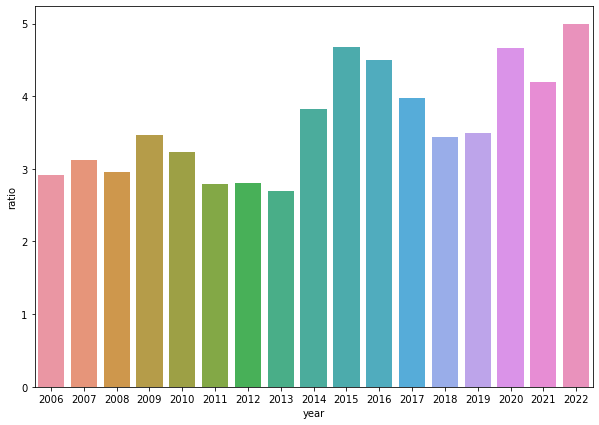

In [93]:
plt.figure(figsize=(10, 7))
sns.barplot(df_ratio_plot,x='year',y='ratio')
plt.show()

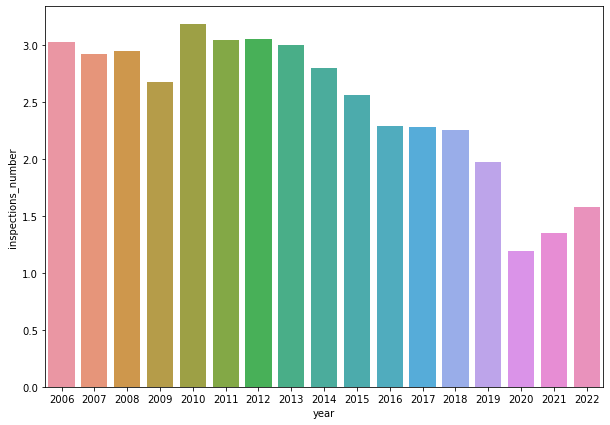

In [94]:
plt.figure(figsize=(10, 7))
sns.barplot(df_ratio_plot,x='year',y='inspections_number')
plt.show()
